### Анализ развлекательного приложения Procrastinate Pro+

**Цель:**

Выявить причины убытков,которые компания терпит последние месяцы, а также помочь компании выйти в плюс.

**Задачи:**
 - изучить откуда приходят пользователи и какими устройствами они пользуются
 - сколько стоит привлечение пользователей из различных рекламных каналов
 - сколько денег приносит каждый клиент
 - когда расходы на привлечение клиента окупаются
 - какие факторы мешают привлечению клиентов
 
**Шаги анализа:**
 
 Компания предоставила нам для анализа три дата фрейма за период с 1 мая по 27 октября 2019 года:
  1. Лог сервера с данными об посещениях пользователей `/datasets/visits_info_short.csv`
  2. Выгрузка их покупок за этот период `/datasets/orders_info_short.csv`
  3. Рекламные расходы `/datasets/costs_info_short.csv`
  
Для начала, нам необходимо изучить все фреймы: выявить явные и неявные дубликаты, пропуски, типы данных и выполнить предобработку для дальнейшего корректного анализа. 

Расчитать бизнес-метрики: LTV, ROI, удержание, конверсию. Для этого нам необходимо подготовить соответствующие функции, а также функции для построения графиков.

Провести исследовательский анализ: составить профили пользователей и изучить их привлечение по всех показателях(регион, девайс, канал), визуализировать данные.

Провести маркетинговый анализ: посчитать общие затраты на рекламу по всем каналам, визуализировать изменение затрат по источникам и рассчитать затраты на привлечение одного пользователя (САС).

Проверсти оценку рекламной кампании: провести анализ окупаемости по всех показателях(регион, девайс, канал) использую полученные графики LTV, CAC и ROI

Сделать выводы на основании полученного анализа и составить рекомендации для компании.

Данный анализ будет выполнен в 6 этапов:
  1. Предобработка данных
  2. Оформление функций для расчета LTV, ROI, удержания и конверсии
  3. Исследовательский анализ
  4. Маркетинговый анализ
  5. Оценка рекламной кампании
  6. Выводы и рекомендации 

### Шаг 1: Предобработка данных

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
#загрузим датафреймы и сохраним их в переменные

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#создадим функицию для ознакомления с датафреймом

def pre_processing(data):
    
    #проверим наличие явных дубликатов
    dub_count = data.duplicated().sum()
    
    #проверим наличие пропусков в каждом столбце
    nan_count = data.isna().sum()
    
    #выведем первые пять строк фрейма
    head_info = display(data.head())
    
    #выведем общую информацию о фрейме
    inform = data.info()
    
    return head_info, inform, dub_count, nan_count

In [4]:
#изучим визуально фреймы вызвав функцию pre_processing

pre_processing(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


(None,
 None,
 0,
 User Id          0
 Region           0
 Device           0
 Channel          0
 Session Start    0
 Session End      0
 dtype: int64)

In [5]:
pre_processing(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


(None,
 None,
 0,
 User Id     0
 Event Dt    0
 Revenue     0
 dtype: int64)

In [6]:
pre_processing(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(None,
 None,
 0,
 dt         0
 Channel    0
 costs      0
 dtype: int64)

* Из данных видно, что пропусков в данных нет, но столбцы, которые содержат дату имеют тип _object_, поэтому необходимо привести все даты к типу _datetime_
* Явные дубликаты отсутствуют
* Столбцы необходимо переименовать и привести к "змеиному" типу

In [7]:
#приведём наименования всех столбцов к нижнему регистру и "змеиному" типу
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [8]:
#изменим тип данных во всех столбах, где есть дата

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
#проверим данные в столбцах на неявные дубликаты, для этого приведём их к нижнему регистру

visits['region'] = visits['region'].str.lower()
visits['device'] = visits['device'].str.lower()
visits['channel'] = visits['channel'].str.lower()
costs['channel'] = costs['channel'].str.lower()

In [10]:
#изучим уникальные значения

print(visits['region'].sort_values().unique())
print()
print(visits['device'].sort_values().unique())
print()
print(visits['channel'].sort_values().unique())
print()
print(costs['channel'].sort_values().unique())

['france' 'germany' 'uk' 'united states']

['android' 'iphone' 'mac' 'pc']

['adnonsense' 'faceboom' 'lambdamediaads' 'leapbob' 'mediatornado'
 'opplecreativemedia' 'organic' 'rocketsuperads' 'tiptop' 'wahoonetbanner'
 'yrabbit']

['adnonsense' 'faceboom' 'lambdamediaads' 'leapbob' 'mediatornado'
 'opplecreativemedia' 'rocketsuperads' 'tiptop' 'wahoonetbanner' 'yrabbit']


Здесь также всё в порядке, неявные дубликаты не выявлены, можем приступать к следующему шагу анализа.

Еще раз вызовем функцию `pre_processing`, чтобы проверить все изменения:

In [11]:
pre_processing(visits)
pre_processing(orders)
pre_processing(costs)

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(None,
 None,
 0,
 dt         0
 channel    0
 costs      0
 dtype: int64)

### Шаг №2: Оформление функций для расчета LTV, ROI, удержания и конверсии

####  `get_profiles()` — функция для создания профилей пользователей

In [12]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### `get_retention()` — функция для подсчёта Retention Rate

In [13]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### `get_conversion()` — функция для подсчёта конверсии

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### `get_ltv()` — функция для подсчёта LTV и ROI

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### `filter_data()` — функция для сглаживания данных

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### `plot_retention()` — функция для построения графика Retention Rate

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### `plot_conversion()` — функция для построения графика конверсии

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### `plot_ltv_roi` — функция для визуализации LTV и ROI

In [19]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все функции подготовлены, можно переходить к шагу №3 анализа.

### Шаг №3: Исследовательский анализ данных

#### Даты привлечения пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [20]:
#для этого вызовем функцию get_profiles и передадим ей необходимые аргументы
#т.к. у нас отсутствуют данные с событиями, передадим этому аргументу пустой список

events=[]
profiles = get_profiles(visits, orders, events, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [21]:
#определим минимальную и максимальную дату привлечения пользователей

print(profiles['first_ts'].min(), profiles['first_ts'].max())

2019-05-01 00:00:41 2019-10-27 23:59:04


**_Вывод:_** _Минимальная дата 1 мая 2019 года, максимальная 27 октября 2019 года, что соответствует данным, полученных от Заказчика_

#### Привлечение пользоваталей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [22]:
#сгруппируем данные по региону и посчитаем количество пользователей, количество и долю плательщиков

profiles_regions = (profiles
                    .groupby('region')
                    .agg({'user_id':'count', 'payer':['sum', 'mean']})
                    .reset_index()
                   )
profiles_regions

region user_id payer          
                   count   sum      mean
0         france   17450   663  0.037994
1        germany   14981   616  0.041119
2             uk   17575   700  0.039829
3  united states  100002  6902  0.069019

In [23]:
#переименуем столбцы и избавимся от мультииндекса

profiles_regions.columns=['region','total_users', 'payer_total', 'payer_%']

#переведем столбец в проценты

profiles_regions['payer_%'] = profiles_regions['payer_%'].apply(lambda x: format(x,'.2%'))

#выполним сортировку
profiles_regions.sort_values(by='payer_total', ascending=False)

,region,total_users,payer_total,payer_%
3,united states,100002,6902,6.90%
2,uk,17575,700,3.98%
0,france,17450,663,3.80%
1,germany,14981,616,4.11%


In [24]:
# Код ревьюера
profiles.groupby('region').agg({'user_id':'count', 'payer':'mean'}).reset_index().style.format({'payer': '{:.2%}'})
                   

,region,user_id,payer
0,france,17450,3.80%
1,germany,14981,4.11%
2,uk,17575,3.98%
3,united states,100002,6.90%


**_Вывод:_** _Мы видим, что большая часть пользователей пришла из США - 100 тыс., а также она с  большим отрывом лидирует по платным пользователям, её доля составляет 6.9%, на последнем месте Франция - 3.8%_

#### Привлечение пользователей по устройствам

Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [25]:
#сгруппируем данные по девайсам и посчитаем количество пользователей и количество плательщиков

profiles_device = (profiles
                    .groupby('device')
                    .agg({'user_id':'count', 'payer':['sum', 'mean']})
                    .reset_index()
                   )
profiles_device

device user_id payer          
             count   sum      mean
0  android   35032  2050  0.058518
1   iphone   54479  3382  0.062079
2      mac   30042  1912  0.063644
3       pc   30455  1537  0.050468

In [26]:
#переименуем столбцы и избавимся от мультииндекса

profiles_device.columns=['device','total_users', 'payer_total', 'payer_%']

#переведем столбец в проценты

profiles_device['payer_%'] = profiles_device['payer_%'].apply(lambda x: format(x,'.2%'))

#выполним сортировку
profiles_device.sort_values(by='payer_total', ascending=False)

,device,total_users,payer_total,payer_%
1,iphone,54479,3382,6.21%
0,android,35032,2050,5.85%
2,mac,30042,1912,6.36%
3,pc,30455,1537,5.05%


**_Вывод:_** _На основании полученной таблицы можем сделать вывод, что большинство пользователей пользуются **iphone** - 54 479, что является логичным, так как большинство пользователей из США; наибольшая доля платящих клиентов приходится на дивайс **mac** - 6.36%, на последнем месте **персональный компьютер** - 5.05 %_

#### Привлечение пользователей по источникам

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [27]:
#сгруппируем данные по источникам привлечения и посчитаем количество пользователей и количество плательщиков

profiles_channels = (profiles
                    .groupby('channel')
                    .agg({'user_id':'count', 'payer':['sum', 'mean']})
                    .reset_index()
                   )
profiles_channels

channel user_id payer          
                         count   sum      mean
0           adnonsense    3880   440  0.113402
1             faceboom   29144  3557  0.122049
2       lambdamediaads    2149   225  0.104700
3              leapbob    8553   262  0.030633
4         mediatornado    4364   156  0.035747
5   opplecreativemedia    8605   233  0.027077
6              organic   56439  1160  0.020553
7       rocketsuperads    4448   352  0.079137
8               tiptop   19561  1878  0.096007
9       wahoonetbanner    8553   453  0.052964
10             yrabbit    4312   165  0.038265

In [28]:
#переименуем столбцы и избавимся от мультииндекса

profiles_channels.columns=['channel','total_users', 'payer_total', 'payer_%']

#переведем столбец в проценты

profiles_channels['payer_%'] = profiles_channels['payer_%'].apply(lambda x: format(x,'.2%'))

#выполним сортировку
profiles_channels.sort_values(by='payer_total', ascending=False)

,channel,total_users,payer_total,payer_%
1,faceboom,29144,3557,12.20%
8,tiptop,19561,1878,9.60%
6,organic,56439,1160,2.06%
9,wahoonetbanner,8553,453,5.30%
0,adnonsense,3880,440,11.34%
7,rocketsuperads,4448,352,7.91%
3,leapbob,8553,262,3.06%
5,opplecreativemedia,8605,233,2.71%
2,lambdamediaads,2149,225,10.47%
10,yrabbit,4312,165,3.83%


**_Вывод:_** _На основании полученной таблицы можем сделать вывод, что источник из которого вернулось наибольшее количество платящих клиентов это **faceboom** - 3 557, и на него же приходится наибольшая доля платящих клиентов - 12.2 %, на последнем месте **opplecreativemedia** - 2.71 %. Наибольшее количество пользователей пришло из источника **organic**, но доля платящих клиентов для него наименьшая 2.06%_

### Шаг №4: Маркетинговый анализ

#### Расчет расходов на маркетинг

Посчитаем общую сумму расходов на маркетинг

In [29]:
total_costs = costs['costs'].sum()
total_costs.round(2)

105497.3

**_Вывод:_** _Общая сумма, потраченная на рекламную кампанию за весь период составляет **105.5 млн.**_

Посмотрим, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [30]:
#сгруппируем затраты по столбцу channel и отсортируем по убыванию

costs_by_channel = (costs
                    .groupby('channel')
                    .agg({'costs':'sum'})
                    .reset_index()
                    .sort_values(by='costs', ascending=False)
                   )
costs_by_channel

,channel,costs
7,tiptop,54751.30
1,faceboom,32445.60
8,wahoonetbanner,5151.00
0,adnonsense,3911.25
5,opplecreativemedia,2151.25
6,rocketsuperads,1833.00
3,leapbob,1797.60
2,lambdamediaads,1557.60
4,mediatornado,954.48
9,yrabbit,944.22


**_Вывод:_** _Наибольшая сумма рекламных затрат приходится на источник **tiptop** - 54 751.3. Несмотря на то, что компания потратила на 40% больше денег на источник tiptop чем на faceboom, последний показал больший процент платящих пользователей чем у tiptop. Наименьшие затраты пришлись на источники: **mediatornado и yrabbit**_

#### Визуализация расчетов

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

In [31]:
#для построения графика, добавим в датафрейм столбцы: номер недели и номер месяца

costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

costs.head()

,dt,channel,costs,week,month
0,2019-05-01,faceboom,113.3,18,5
1,2019-05-02,faceboom,78.1,18,5
2,2019-05-03,faceboom,85.8,18,5
3,2019-05-04,faceboom,136.4,18,5
4,2019-05-05,faceboom,122.1,18,5


In [32]:
#для построения графиков построим сводные таблицы

costs_by_week = costs.pivot_table(
    index = 'week',
    columns = 'channel',
    values = 'costs',
    aggfunc = 'sum'
)

costs_by_month = costs.pivot_table(
    index = 'month',
    columns = 'channel',
    values = 'costs',
    aggfunc = 'sum'
)

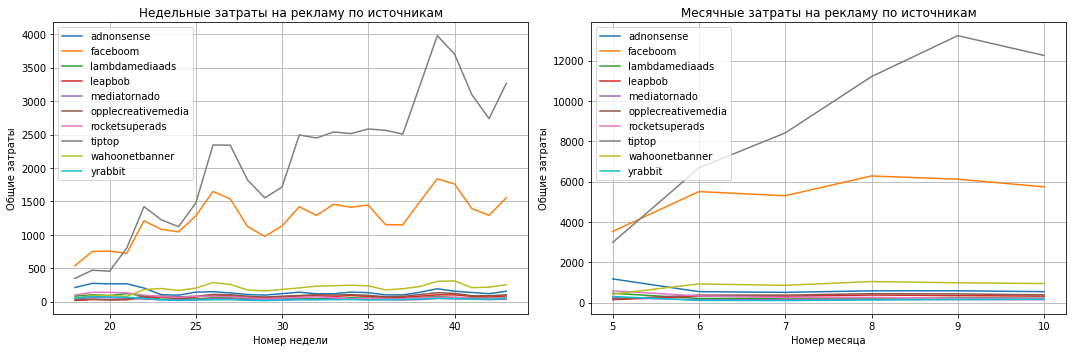

In [33]:
plt.figure(figsize = (15,5))

#строим график по неделям

ax1 = plt.subplot(1,2,1)
costs_by_week.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Общие затраты')
plt.title('Недельные затраты на рекламу по источникам')

#строим график по месяцам

ax2 = plt.subplot(1,2,2)
costs_by_month.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Номер месяца')
plt.ylabel('Общие затраты')
plt.title('Месячные затраты на рекламу по источникам')

plt.tight_layout()
plt.show()

Из графика сильно выделяются два источника по затратам: tiptop и faceboom. По этому построим графики без них, чтобы посмотреть динамику затрат для остальных источников.

In [34]:
#удалим из сводной источники tiptop & faceboom и сохраним в новой переменной

costs_by_week2 = costs_by_week.drop(columns = ['tiptop', 'faceboom'])
costs_by_month2 = costs_by_month.drop(columns = ['tiptop', 'faceboom'])

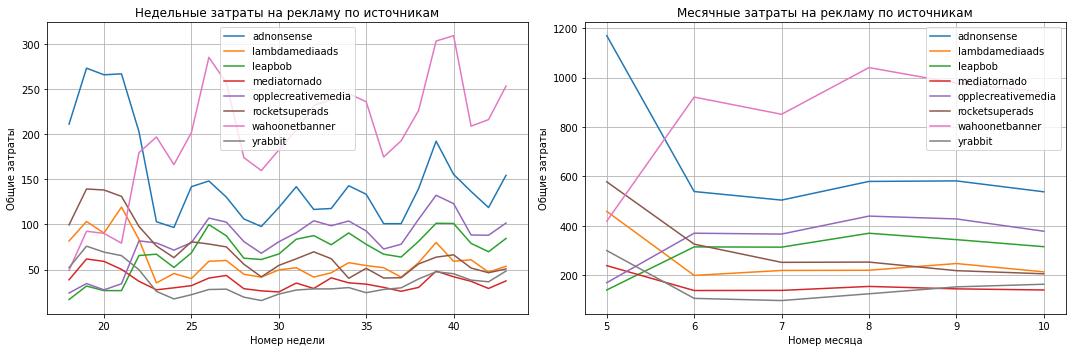

In [35]:
plt.figure(figsize = (15,5))

#строим график по неделям

ax1 = plt.subplot(1,2,1)
costs_by_week2.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Номер недели')
plt.ylabel('Общие затраты')
plt.title('Недельные затраты на рекламу по источникам')

#строим график по месяцам

ax2 = plt.subplot(1,2,2)
costs_by_month2.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('Номер месяца')
plt.ylabel('Общие затраты')
plt.title('Месячные затраты на рекламу по источникам')

plt.tight_layout()
plt.show()

**_Вывод:_** _Из графиков мы видим, что затраты на рекламу для источников **tiptop и faceboom** постоянно увеличиваются, но с 9 месяца (38 неделя) немного упали. Для всех остальных источников расходы на рекламу остаются практически на одном уровне, они не привышают 500 за неделю. Также видно, что с пятого месяца бюжет на рекламу сократился практически для всех источников и остается стабильным в районе 200/мес, но для таких источников как: **wahoonetbanner, opplecreativemedia, leapbob** затраты с 5-го месяца увеличились. Можно выделить резкий скачок на увеличение затрат для **wahoonetbanner**, который до 10 месяца показывает самый высокий порог, не ниже 800/мес; а также резкий скачок на уменьшение затрат для **adnonsense**, с 1200/мес до 550/мес буквально за один месяц и порог его больше не привышал 600/мес_

#### Расчет САС по источникам

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [36]:
#сгруппируем таблицу по источникам и отсортируем по убыванию САС

cac_by_channel = (profiles
                  .groupby('channel')
                  .agg({'acquisition_cost':'mean'})
                  .reset_index()
                  .rename(columns={'acquisition_cost':'CAC'})
                  .sort_values(by='CAC', ascending=False)
                 )

cac_by_channel

,channel,CAC
8,tiptop,2.799003
1,faceboom,1.113286
0,adnonsense,1.008054
2,lambdamediaads,0.724802
9,wahoonetbanner,0.602245
7,rocketsuperads,0.412095
5,opplecreativemedia,0.250000
10,yrabbit,0.218975
4,mediatornado,0.218717
3,leapbob,0.210172


**_Вывод:_** _Самыми дорогими пользователями являются пользователя из источника **tiptop**, САС составляет 2.8, больше в два раза чем для источников **faceboom	и adnonsense**; наименьшие затраты на человека приходятся для источников: **yrabbit, mediatornado, leapbob**. Для них САС составляет менее 0.25. Стоимость "органических" пользователей равна нулю, так как на сайт они перешли самостоятельно, без рекламы._

### Шаг №5: Оценка рекламной кампании

**Задание:** Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Текущая дата - 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

#### Общая оценка рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [37]:
#определим момент анализа и горизонт согласно ТЗ

observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#исключаем всех огранических пользователей, так как они не влияют на рекламные затраты

profiles1 = profiles.query('channel != "organic"')

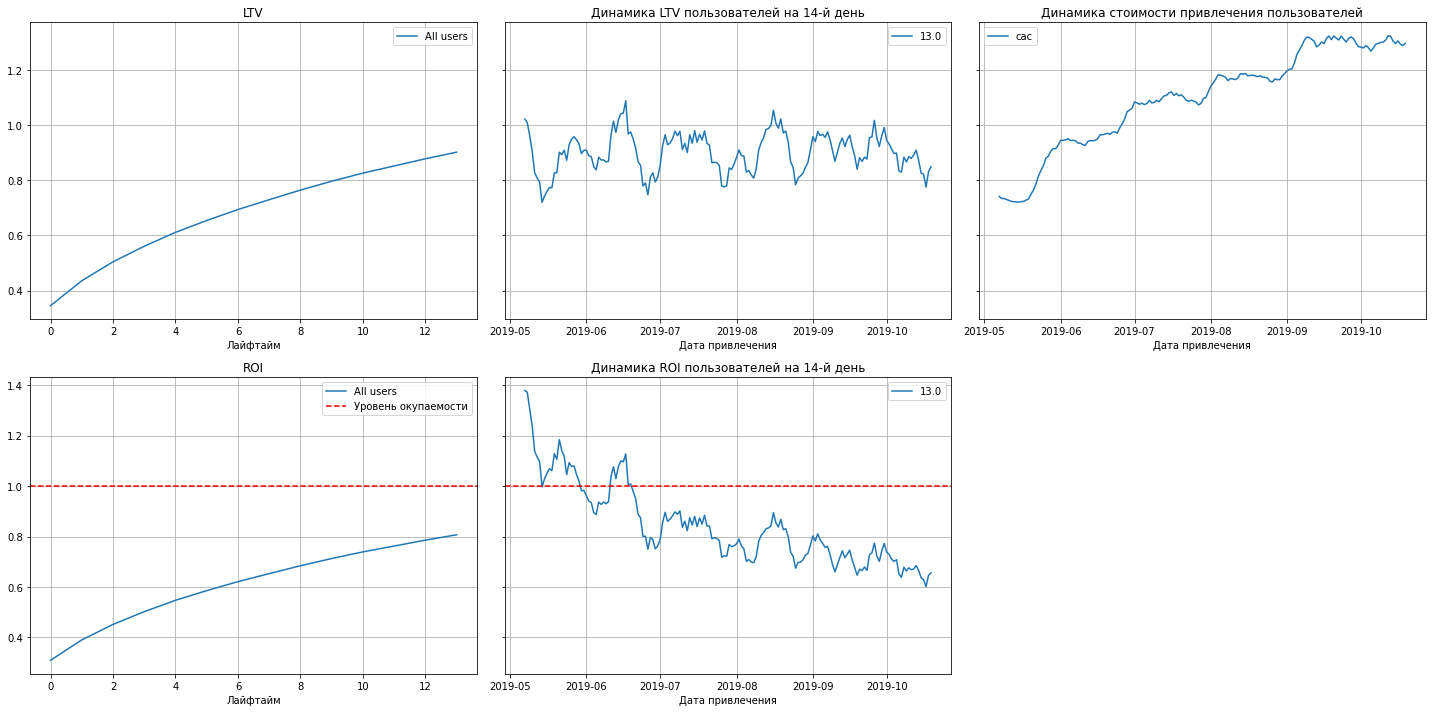

In [38]:
#расчитаем LTV и ROI вызвав функцию get_ltv

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days
)

#построим графики динамики LTV, CAC и ROI вызвав функцию plot_ltv_roi

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

_**Вывод:**_
 - _Затраты на рекламу не окупаются, на графике ROI кривая достигла 0.8 на 12-й день, но не пересекла уровень окупаемости - 1_;
 - _LTV и динамика на 14 день стабильны, значит, дело не в ухудшении качества пользователей_;
 - _Стоимость привлечения САС сильно увеличилось, что может быть связано с увеличением рекламного бюджета_;
 - _Динамика ROI на 14 день начала стабильно падать, что связано с увеличением САС._


Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

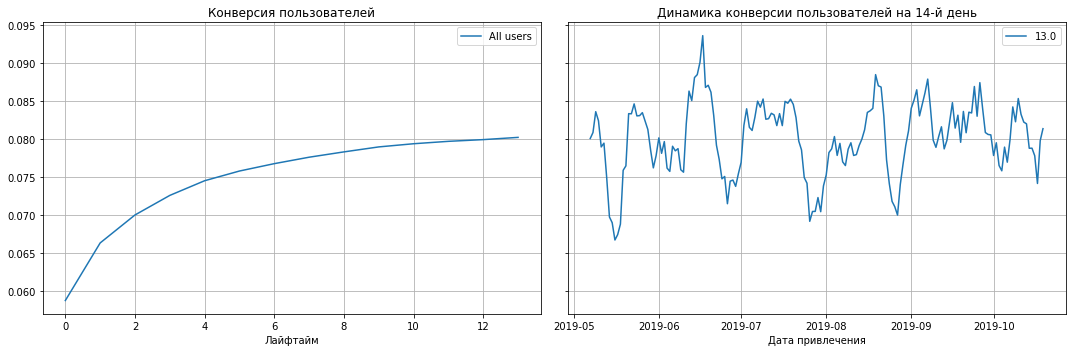

In [39]:
#посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion()

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**_Вывод:_** _Исходя из графиков, пользователи конверсируются хорошо и постоянно, кривая стремится к единице._

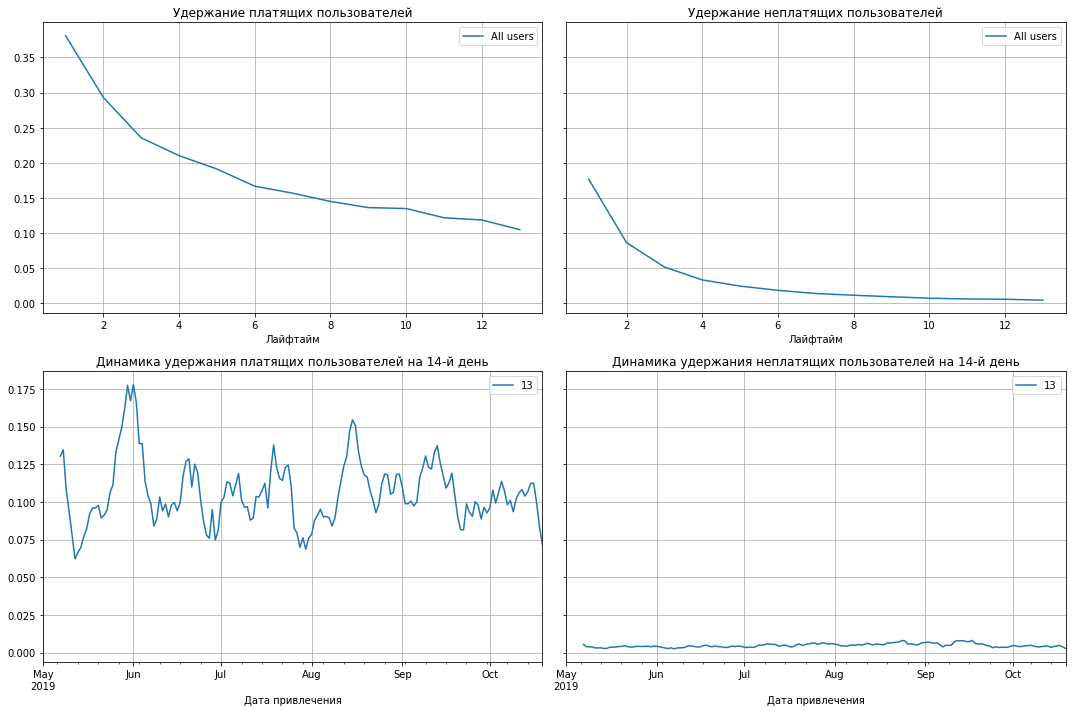

In [40]:
#теперь посчитаем и визуализируем удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**_Вывод:_** _Графики удержания показывают ожидаемый результат: удержание стабильно уменьшается, при этом платящие пользователи удерживаются намного лучше чем неплатящие._

#### Оценка рекламы с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Рассчитаем и визуализируем конверсию и удержание.

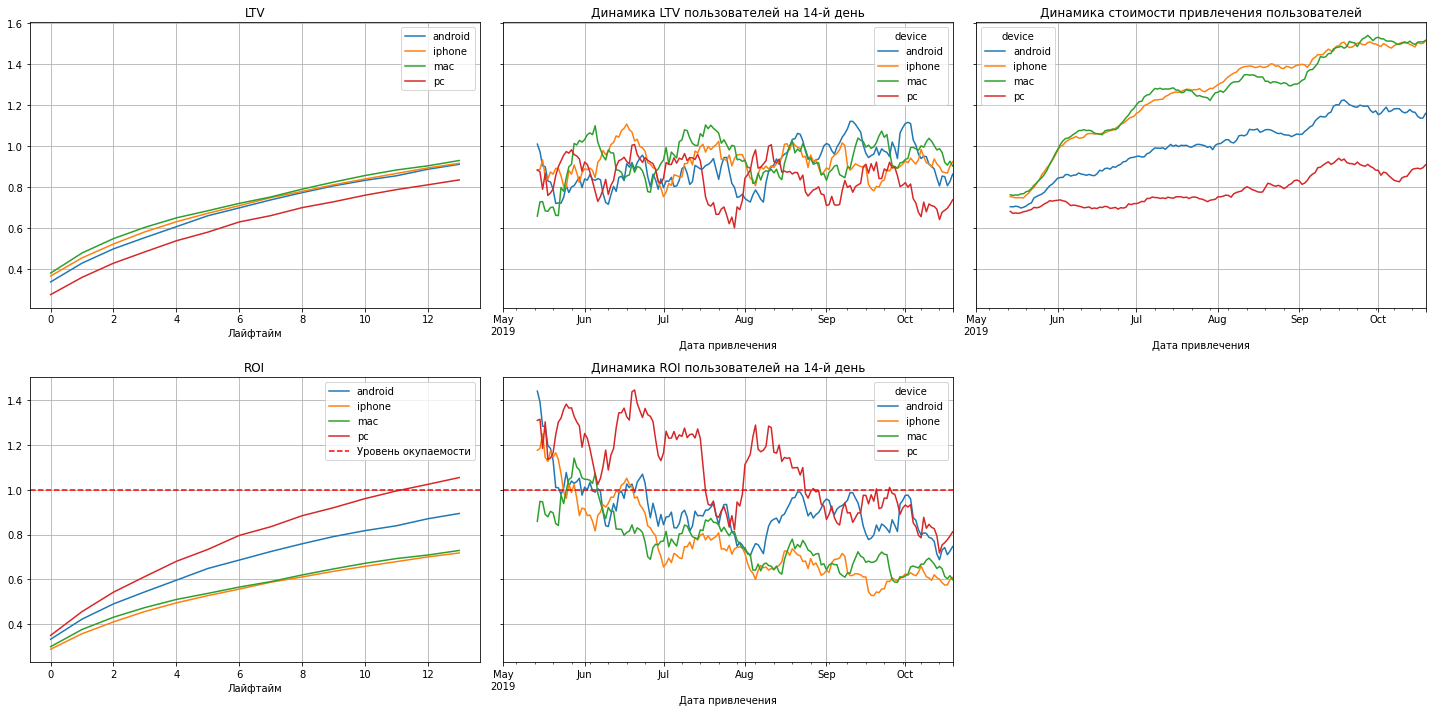

In [41]:
#посчитаем и визуализируем окупаемость рекламы по устройствам, передадим dimensions столбец device

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**_Вывод:_** _Из графика видно, что реклама на всех устройствах не окупается, кроме **рс**, он превысел уровень окупаемости на 11 лайфтайм. LTV по прежнему стабилен и стремится к единице, значит дело не в ухудшении качества пользоваталей какой либо из групп устройства._

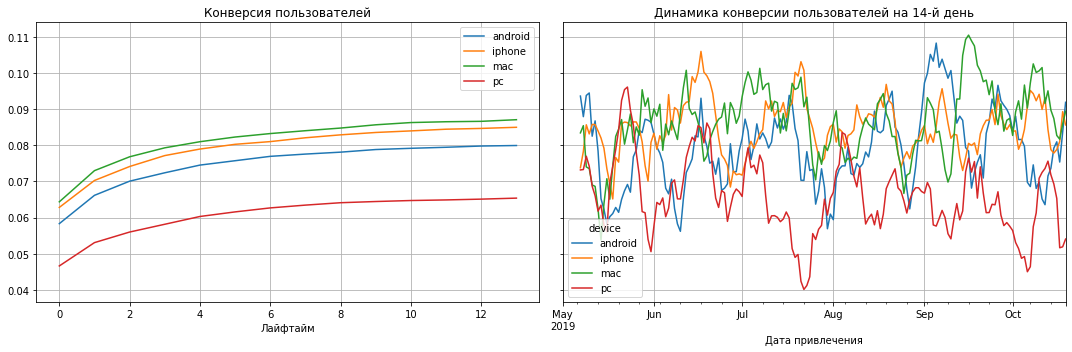

In [42]:
#посчитаем и визуализируем конверсию с разбивкой по девайсам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**_Вывод:_** _Наилучшую конверсию показывают устройства **mac и iphone**, хуже всего конверсируются пользователи **pc**._

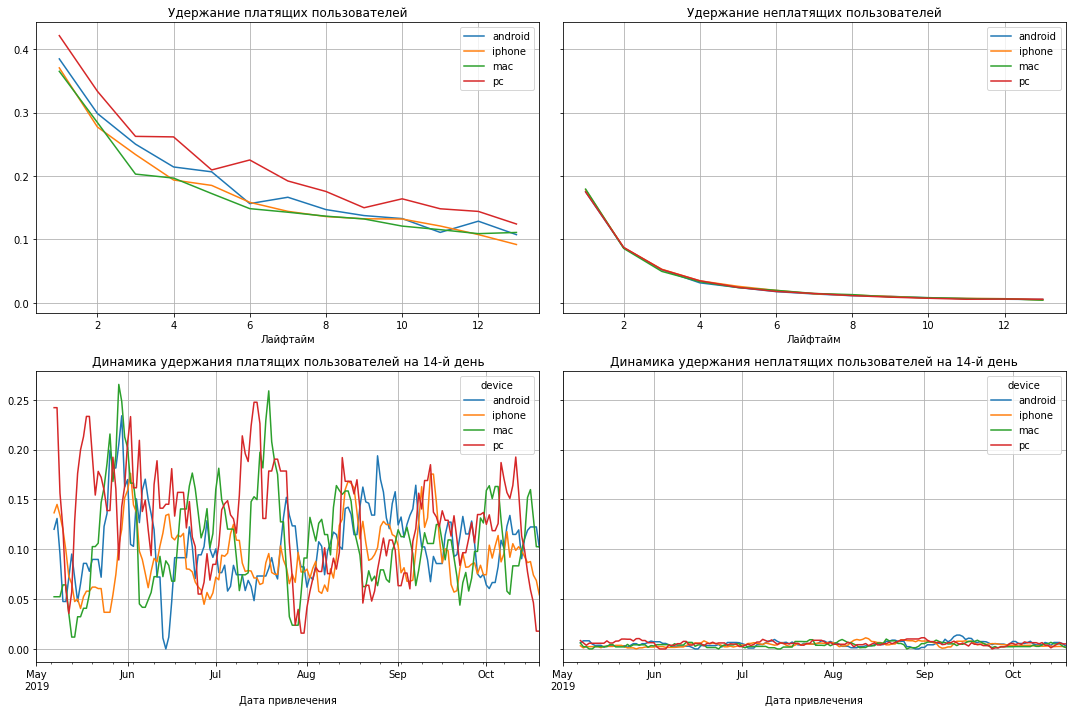

In [43]:
#теперь посчитаем и визуализируем удержание пользователей c разбивкой по устройствам

dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**_Вывод:_** _Хуже всего удерживаются пользователи девайсов **mac и iphone**, возможно это связано с какими-то особенностями для этого региона (USA), проблемы с оплатой и т.п._

#### Оценка рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Рассчитаем и визуализируем конверсию и удержание.

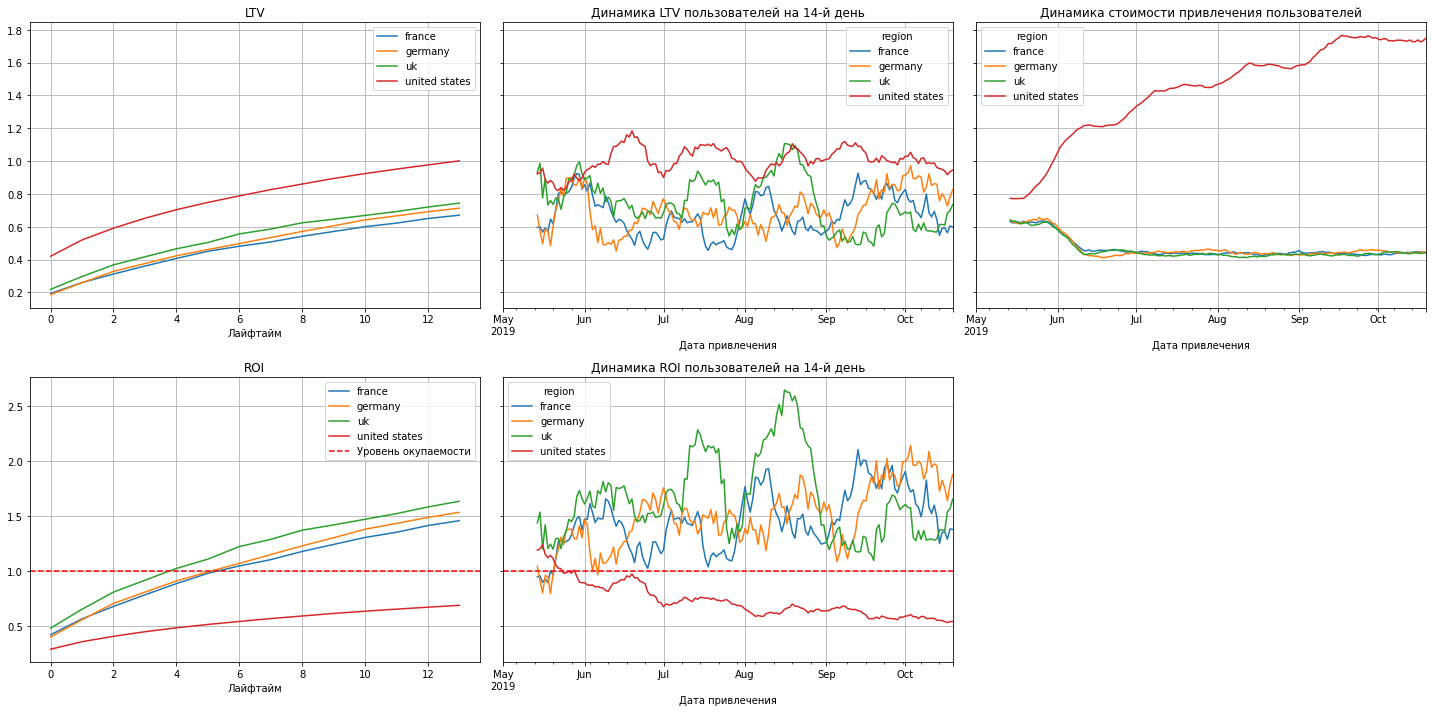

In [44]:
#посчитаем и визуализируем окупаемость рекламы по регионам, передадим dimensions столбец region

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**_Вывод:_** _График ROI подтверждает наш предыдущий вывод, все страны окупаются, кроме **united states**, при этом затраты на рекламу для этого региона стабильно увеличиваются. Для других регионов затраты уменьшаются и остаются стабильными, при этом реклама окупается уже на 4 день лайфтайма. Кажется мы нашли первую причину возникновения убытков._

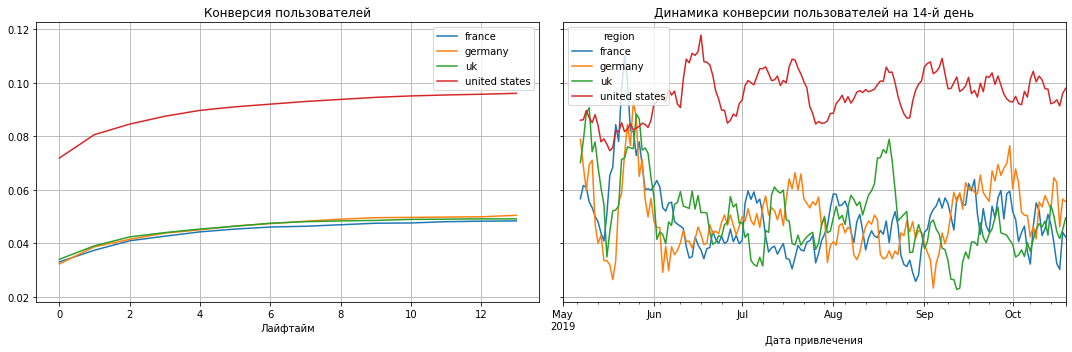

In [45]:
#посчитаем и визуализируем конверсию с разбивкой по регионам

dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**_Вывод:_** _Конверсия для **united states** самая высокая._

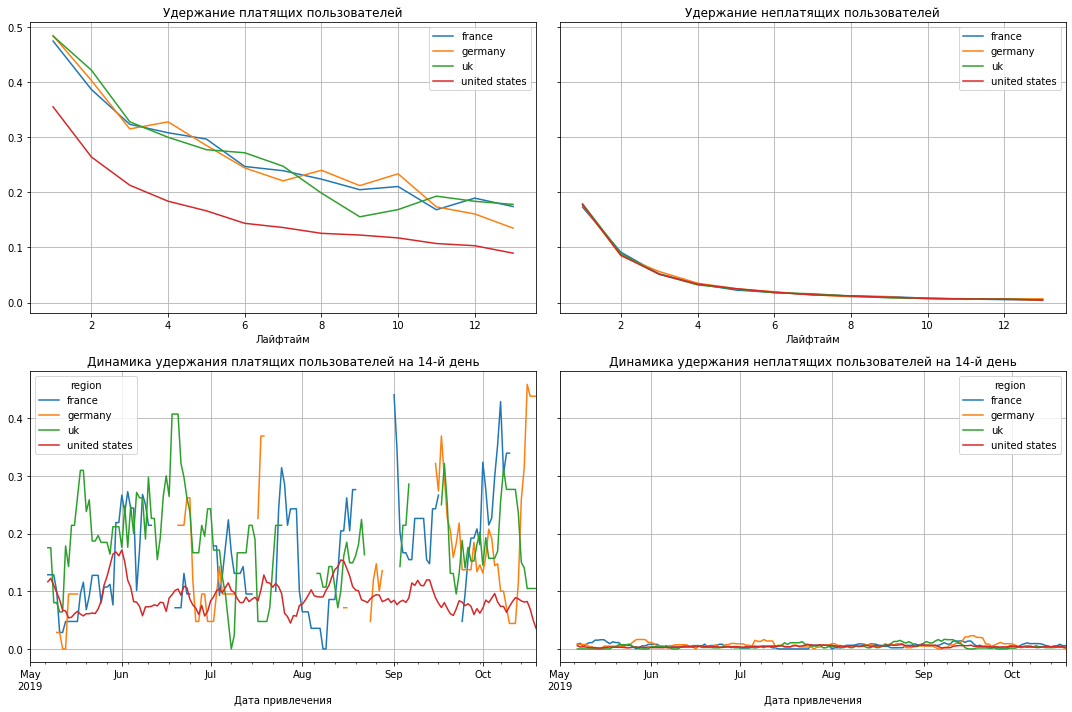

In [46]:
#теперь посчитаем и визуализируем удержание пользователей c разбивкой по регионам

dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У США плохое удержание, рассмотрим удержание для этой страны с разбивкой по источникам. Для этого сделаем срез данных и передадим его функции `get_retention`

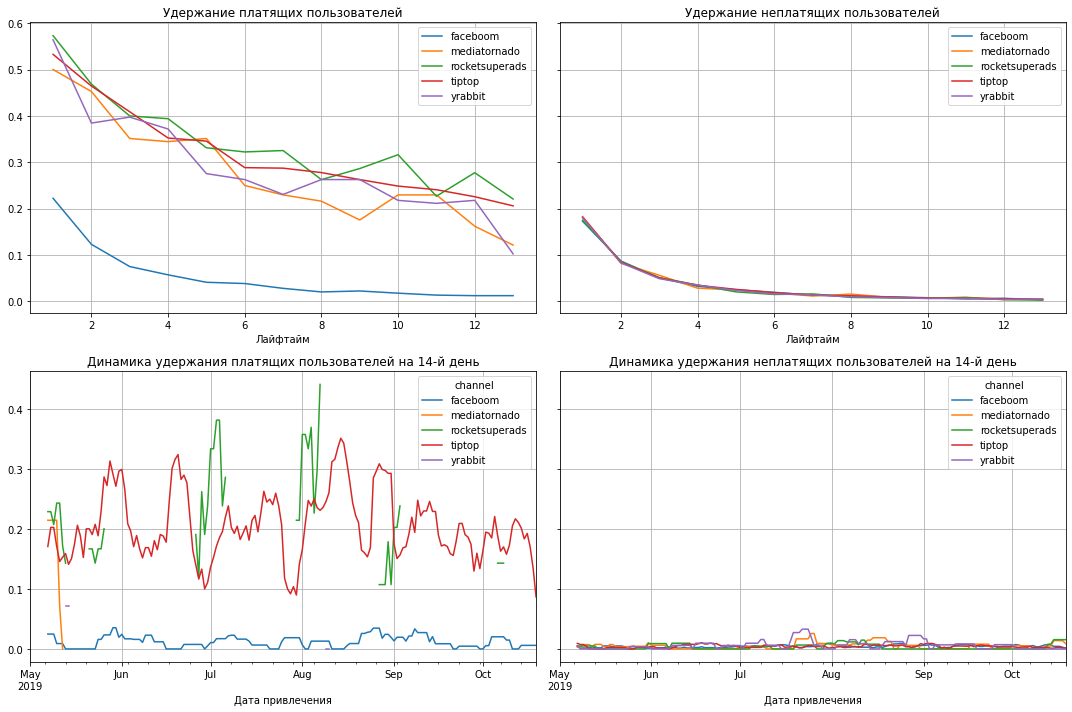

In [47]:
profiles2 = profiles1.query('region == "united states"')

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles2, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**_Вывод:_** _Несмотря на то, что конверсия для **united states** самая высокая, удерживаются пользователи плохо. Мы построили графики удержания, с разбивкой по источникам, для региона США и выяснили, что имеем большие проблемы с **faceboom**, пользователей приходит с него много, рекламные средства выделаются большие, но удержание самое низкое, скорее всего есть техническая проблема связанная с оплатой. Высокое удержание показывает приложение **tiptop & rocketsuperads**_

#### Оценка рекламы по источникам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Рассчитаем и визуализируем конверсию и удержание.

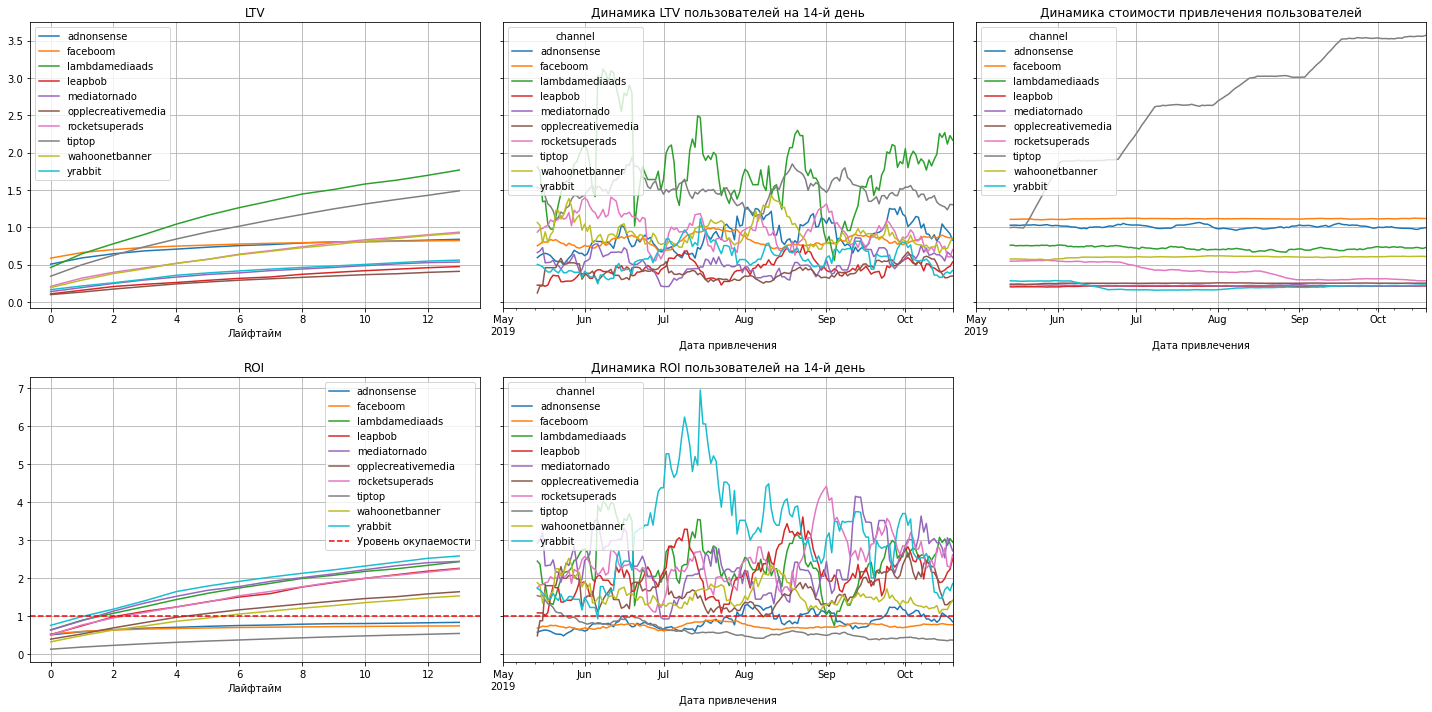

In [48]:
#посчитаем и визуализируем окупаемость рекламы по регионам, передадим dimensions столбец channel

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**_Вывод:_** _Из графика видно, что три источника не окупаются: **tiptop, faceboom и adnonsense**, при этом расходы на рекламу для tiptop постоянно увеличиваются, что также являются одной из причин не окупаемости рекламы. Для других источников затраты на рекламы остаются стабильными. Самым окупаемым источником является **yrabbit**_

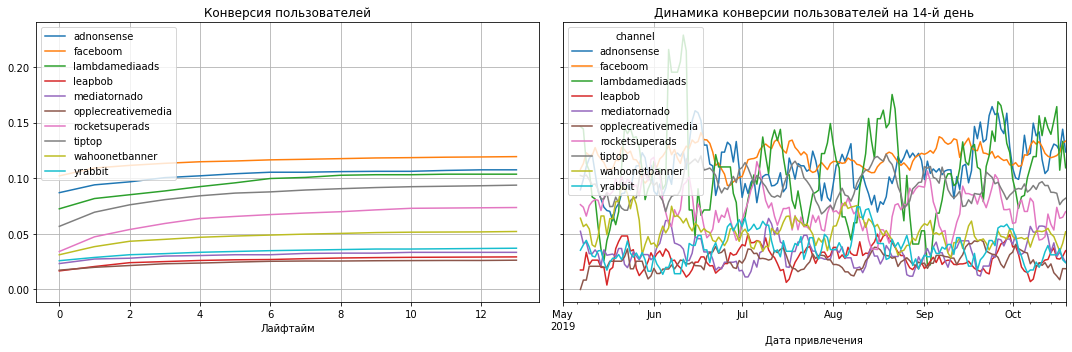

In [49]:
#посчитаем и визуализируем конверсию с разбивкой по источникам

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**_Вывод:_** _Из графика видно, что лучше всего конверсируются пользователи из источников: **faceboom, adnonsense и lambdamediaads**, хуже всего - **tiptop & leapbob**_

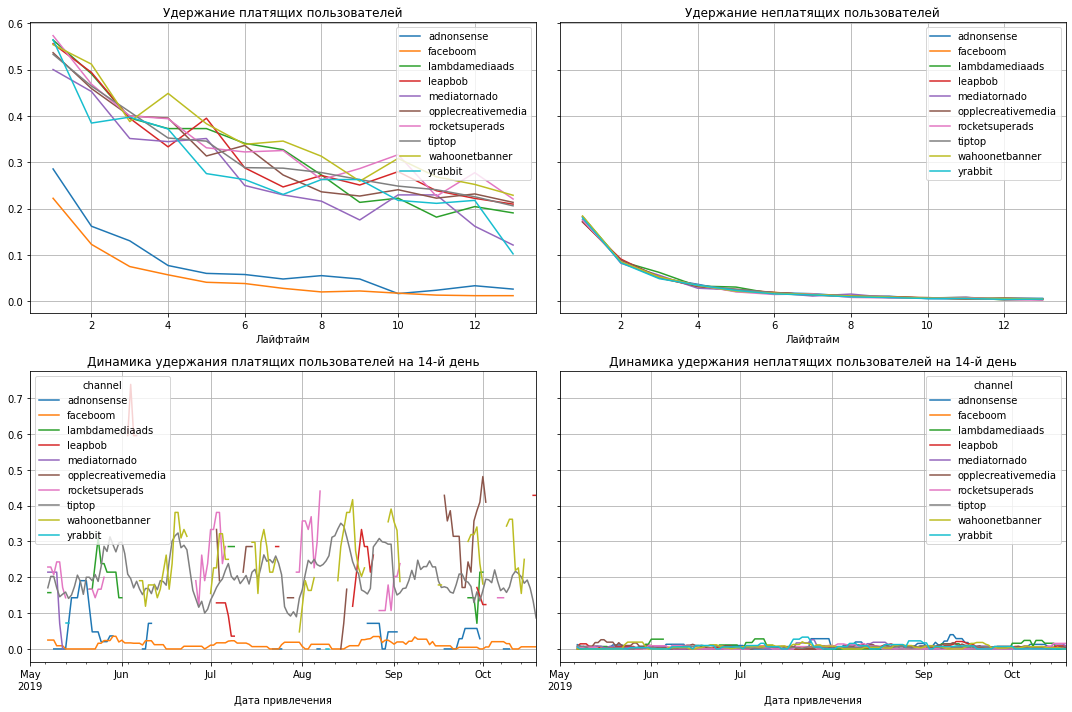

In [50]:
#теперь посчитаем и визуализируем удержание пользователей c разбивкой по источникам

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**_Вывод:_** _Очень сильно выделяются два источника крайне низким удержанием: **faceboom и adnonsense**_

**Промежуточный вывод**:

    - Исходя из полученных графиков в целом реклама не окупается.
    - Учитывая показатели графиков по устройствам хорошую конверсию показали mac, android и iphone, расходы на рекламу для них можно уменьшить, чтобы увеличить окупаемость. Также нужно провести мероприятия для удержания пользователей на PC, выявить причины низкого удержания, возможно это связано с интерфейсом источника и пользователям удобнее использовать сайт на телефонах или mac.
    - Негативно на окупаемость сказалась реклама в США на источнике tiptop. Нужно сделать значительное сокращение рекламных расходов, чтобы повысить окупаемость и провести повторно анализ. Также нужно выявить причины низкого удержания пользователей из США на каналах: faceboom и adnonsense, возможно есть технические проблемы.
    - Высокую окупаемость показал канал yrabbit, при этом стоимость привлечения одного клиента низкая 0.22. Можно увеличить стоимость рекламы для этого источника, чтобы привлечь больше платящих пользователей, доля которых пока что составляет 3.38%.


### Шаг №6: Выводы и рекомендации

**Выводы по анализу развлекательного приложения Procrastinate Pro+**

Мы провели анализ, чтобы выявить причины убытков компании и помочь ей выйти в плюс. Мы изучили данные за период с 1 мая по 27 октября 2019 года, а именно посещения пользователей, их покупки и расходы на рекламу. На основании полученных данных составили профили покупателей и выяснили следующее:
 - Наибольшая доля плательщиков приходится для региона `США` - 6.9 %, наименьшая для `Франции` - 3.8 %
 - Большинство пользователей пользуются `iphone` (54 479), и на них же приходится большая доля платящих - 6.21 %, наибольшая доля приходится на `mac` - 6.36 %, а наименьшая на `pc` - 5.05 %
 - Самое большое количество пользователей пришли из источника `organic`, но на него приходится наименьшая доля платящих - 2.06 %, также низкие показатели у источника `opplecreativemedia` - 2.71 %. Больше всего платящих пользователей пришло из источника `faceboom` - 12.2 %
 - За весь период на рекламу было потрачено 105.5 млн. Самая большая сумма была потрачена на источник `tiptop` - 54 751.3, наименьшая для `yrabbit` - 944
 - Мы рассчитали стоимость привлечения одного клиента (САС) с разбивкой по источникам и выяснили, что самым дорогим является пользователь из источника `tiptop` - 2.79, самым дешевым для `leaptop` и `mediatomado` - 0.21
 
Мы задали момент анализа (29.11.2019) и горизонт (14 дней), чтобы визуализировать рассчеты LTV, ROI и CAC для анализа окупаемости рекламы. Мы исключили органических пользователей, так как на них не выделялись рекламные средства. Сделали следующие выводы:
 - В целом реклама не окупается
 - Затраты на рекламу систематически растут
 - LTV плавно растёт и стремится к единице, показывая, что дело не в ухудшении качества пользователей
 - Пользователи на постоянной основе хорошо конвертируются
 
Чтобы выявить причины убытков, мы рассчитали и визуализировали LTV, ROI, CAC, конверсию и удержание с разбивкой по устройствам, странам и источникам. Сделали следующие выводы:
 - Реклама окупилась только для устройста `pc`, для всех регионов, кроме `united state`. Самый высокий показатель окупаемости у источника `yrabbit`, три источника не пересекли уровень окупаемости, это `tiptop`,`faceboom`, `adnonsense`. Реклама окупается на 4 день лайфтайма
 - Затраты на рекламу систематически увеличивались для жителей из США, которые пользуются каналом `tiptop`, что является нерациональным и требует немедленного снижения расходов.
 - Пользователи из США, который пользуются `iphone` и `mac` лучше всего конверсируются. Наихудшую конверсию показали источники `tiptop`, `leapbob`
 - Лучше всего удерживаются пользователи с устройствами `pc` во всех странах, кроме `united states`. Также меньше всего удерживаются пользователи на каналах `faceboom`, `adnonsense`

**Рекомендации для маркетингового отдела**

1. Мы рассчитали и визуализировали основные бизнес-метрики (LTV, ROI, CAC, конверсию и удержание пользователей) выяснили, что в целом реклама не окупается.
2. Хорошую конверсию показали такие устройства как: `mac`, `android` и `iphone`; расходы на рекламу для них можно уменьшить, чтобы увеличить окупаемость. Также нужно провести мероприятия для удержания пользователей на устройствах `PC`, выявить причины низкого удержания, возможно это связано с интерфейсом источника и пользователям удобнее использовать сайт на телефонах или mac. Провести опрос пользователей и получить от них обратную связь, о том, что можно улучшить на сайте.
3. Негативно на окупаемость сказалась реклама в `united states` на источнике `tiptop`. Нужно сделать значительное сокращение рекламных расходов, чтобы повысить окупаемость и провести повторно анализ. Также нужно выявить причины низкого удержания пользователей из США на каналах: `faceboom` и `adnonsense`, возможно есть технические проблемы.
4. Высокую окупаемость показал канал `yrabbit`, при этом стоимость привлечения одного клиента низкая 0.22. Можно увеличить стоимость рекламы для этого источника, чтобы привлечь больше платящих пользователей, доля которых пока что составляет 3.38%.